In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import sys
import seaborn as sns
vdfx = pd.read_csv("../csv/vivado_dct.csv", index_col=0)
cdfx = pd.read_csv("../csv/catapult_dct_latency.csv", index_col=0)
li=[]
viv_violin=pd.read_csv("../csv/vivado_dct_violin.csv",index_col=None)
li.append(viv_violin)
cat_violin=pd.read_csv("../csv/catapult_dct_violin.csv",index_col=None)
li.append(cat_violin)
violin=pd.concat(li, axis=0, ignore_index=True)
l2=[]
l2.append(violin)
cdfx['throughput'] = cdfx['obj1'].min()*1/cdfx['obj1']
vdfx['throughput'] = cdfx['obj1'].min()*1/vdfx['obj1']
cdfx['ff_inv'] = 1/cdfx['ff']
vdfx['ff_inv'] = 1/vdfx['ff']
cdfx['lut_inv'] = 1/cdfx['lut']
vdfx['lut_inv'] = 1/vdfx['lut']
cdfx['1/obj2'] = cdfx['obj2'].min()*1/cdfx['obj2']
vdfx['1/obj2'] = cdfx['obj2'].min()*1/vdfx['obj2']
cdfx['clbUtil'] = cdfx['obj2']/147780
vdfx['clbUtil'] = vdfx['obj2']/147780
# drop columns, regularize knobs  
cdfx['mem_partition_size1'] = cdfx['knob_array_partition2']
vdfx['mem_partition_size1'] = 4194304/(vdfx['knob_array_partition'])
cdfx['mem_partition_size2'] = cdfx['knob_array_partition1']
vdfx['mem_partition_size2'] = 16/(vdfx['knob_array_partition'])                   
cdfx = cdfx.drop(columns=['knob_I_B'])
cdfx = cdfx.drop(columns=['knob_array_partition1'])
cdfx = cdfx.drop(columns=['knob_array_partition2'])                                
vdfx = vdfx.drop(columns=['knob_array_partition'])

Text(0.5, 1.0, 'DCT Combined Design Space')

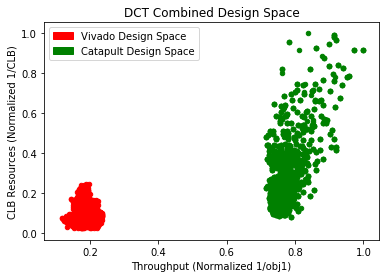

In [2]:
ax1 = vdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='r')
ax = cdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='g', ax=ax1)
#ax1.set_ylim(0,0.016)

red_data = mpatches.Patch(color='red', label='Vivado Design Space')
green_data = mpatches.Patch(color='green', label='Catapult Design Space')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Throughput (Normalized 1/obj1)')
plt.ylabel('CLB Resources (Normalized 1/CLB)')
plt.title("DCT Combined Design Space")

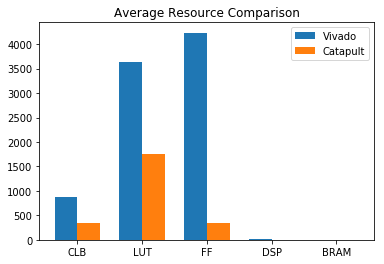

In [3]:
fig, ax = plt.subplots()

N=5
vivado_val=(vdfx['obj2'].mean(),vdfx['lut'].mean(),vdfx['ff'].mean(),vdfx['dsp'].mean(),vdfx['bram'].mean())
catapult_val=(cdfx['obj2'].mean(),cdfx['lut'].mean(),cdfx['ff'].mean(),cdfx['dsp'].mean(),cdfx['bram'].mean())

ind = np.arange(N)
width = 0.35 

p1=ax.bar(ind,vivado_val,width,label='vivado')
p2=ax.bar(ind+width,catapult_val,width,label='catapult')

ax.set_title('Average Resource Comparison')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('CLB', 'LUT', 'FF', 'DSP', 'BRAM'))

ax.legend((p1[0], p2[0]), ('Vivado', 'Catapult'))

ax.autoscale_view()
plt.show()

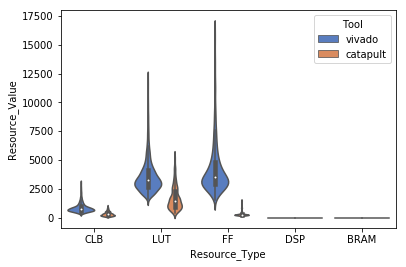

In [16]:
ax = sns.violinplot(x="Resource_Type", y="Resource_Value", hue="Tool",
                    data=violin, palette="muted",
                    scale="count")

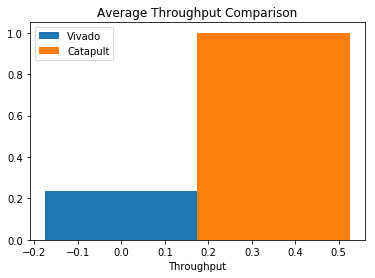

In [4]:
fig, ax = plt.subplots()

N=1
vivado_val=(vdfx['throughput'])
catapult_val=(cdfx['throughput'])

ind = np.arange(N)
width = 0.35 

p1=ax.bar(ind,vivado_val,width,label='vivado')
p2=ax.bar(ind+width,catapult_val,width,label='catapult')

ax.set_title('Average Throughput Comparison')
ax.set_xlabel('Throughput')

ax.legend((p1[0], p2[0]), ('Vivado', 'Catapult'))

ax.autoscale_view()
plt.show()

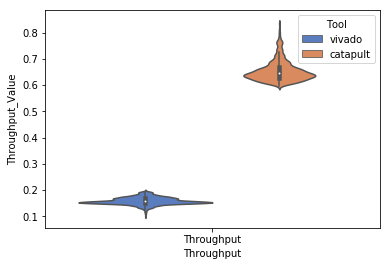

In [17]:
ax=sns.violinplot(x="Throughput",y="Throughput_Value",data=violin,hue="Tool",palette="muted",scale="count")

In [5]:
cdfx = cdfx.reset_index(drop=True)
vdfx = vdfx.reset_index(drop=True)
cv_df = pd.merge(cdfx, vdfx, on=['knob_blockdim_x','knob_blockdim_y','knob_unroll_dct','knob_unroll_width', 'knob_unroll_height', 'mem_partition_size2'], how='inner')


(0, 1)

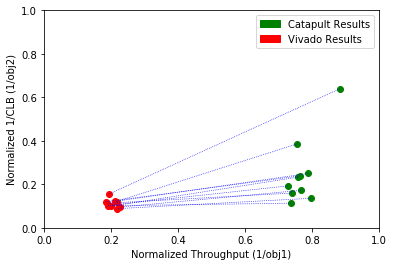

In [6]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample['1/obj2_x'], x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample['1/obj2_y'], x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['1/obj2_x'], row['1/obj2_y']],'b:',linewidth=0.7)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')
plt.ylim(0, 1)
plt.xlim(0, 1)

(0, 0.003)

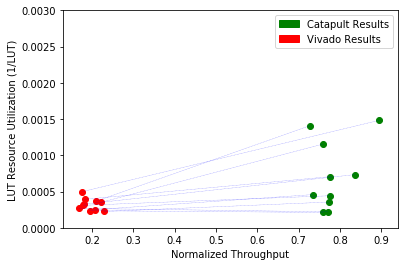

In [7]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample.lut_inv_x, x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample.lut_inv_y, x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['lut_inv_x'], row['lut_inv_y']],'b:',linewidth=0.3)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput')
plt.ylabel('LUT Resource Utilization (1/LUT)')
plt.ylim(0, 0.003)

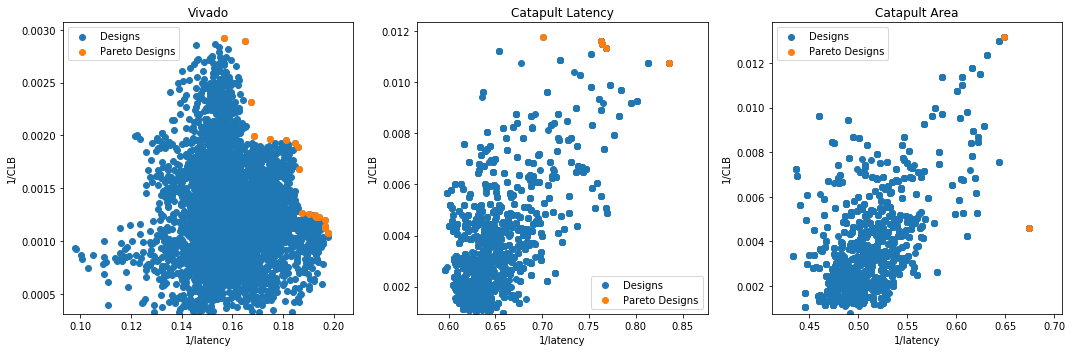

In [10]:
sys.path.append('./pareto_files')
from utils import adrs, read_design_space, approximate_pareto


X1, y1, _, names1, _ = read_design_space('../csv/vivado_dct_sherlock.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

X2, y2, _, names2, _ = read_design_space('../csv/catapult_dct_latency_sherlock.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

X3, y3, _, names3, _ = read_design_space('../csv/catapult_dct_area_sherlock.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)



plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
y_pareto1 = approximate_pareto(y1)[0]
y_pareto1_index = approximate_pareto(y1)[1]
plt.scatter(y1[:,0], y1[:,1],label='Designs')
plt.legend()
plt.scatter(y_pareto1[:,0], y_pareto1[:,1],label='Pareto Designs')
plt.legend()
plt.title("Vivado")
plt.xlabel("1/" + "latency")
plt.ylabel("1/" + "CLB")
plt.xlim(left=y1[:,0].min()*0.95, right=y1[:,0].max()*1.05)
plt.ylim(bottom=y1[:,1].min()*0.95, top=y1[:,1].max()*1.05)
plt.tight_layout()


plt.subplot(1,3,2)
y_pareto2 = approximate_pareto(y2)[0]
y_pareto2_index = approximate_pareto(y2)[1]
plt.scatter(y2[:,0], y2[:,1],label='Designs')
plt.legend()
plt.scatter(y_pareto2[:,0], y_pareto2[:,1],label='Pareto Designs')
plt.legend()
plt.title("Catapult Latency")
plt.xlabel("1/" + "latency")
plt.ylabel("1/" + "CLB")
plt.xlim(left=y2[:,0].min()*0.95, right=y2[:,0].max()*1.05)
plt.ylim(bottom=y2[:,1].min()*0.95, top=y2[:,1].max()*1.05)
plt.tight_layout()


plt.subplot(1,3,3)
y_pareto3 = approximate_pareto(y3)[0]
y_pareto3_index = approximate_pareto(y3)[1]
plt.scatter(y3[:,0], y3[:,1],label='Designs')
plt.legend()
plt.scatter(y_pareto3[:,0], y_pareto3[:,1],label='Pareto Designs')
plt.legend()
plt.title("Catapult Area")
plt.xlabel("1/" + "latency")
plt.ylabel("1/" + "CLB")
plt.xlim(left=y3[:,0].min()*0.95, right=y3[:,0].max()*1.05)
plt.ylim(bottom=y3[:,1].min()*0.95, top=y3[:,1].max()*1.05)
plt.tight_layout()

(0.0, 0.018193185312037587)

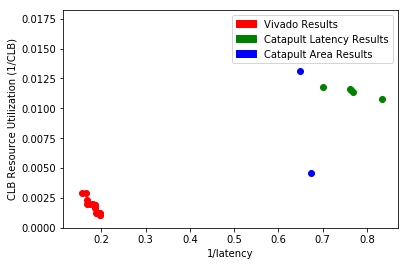

In [11]:
plt.scatter(y_pareto1[:,0], y_pareto1[:,1],c='r')
plt.scatter(y_pareto2[:,0], y_pareto2[:,1],c='g')
plt.scatter(y_pareto3[:,0], y_pareto3[:,1],c='b')


red_data = mpatches.Patch(color='red', label='Vivado Results')
green_data = mpatches.Patch(color='green', label='Catapult Latency Results')
blue_data=mpatches.Patch(color='blue',label='Catapult Area Results')
plt.legend(handles=[red_data, green_data,blue_data])
plt.xlabel('1/latency')
plt.ylabel('CLB Resource Utilization (1/CLB)')
plt.ylim(0.000)